In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

/Users/edilbekabdyrakhmanov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# Define the file paths
subdirectory = "/Users/edilbekabdyrakhmanov/Documents/GitHub/bakeryy/3_Model/Neural_Net_Edilbek/pickle_data_1"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Remove 'Datum' column if it exists
for feature_set in [training_features, validation_features, test_features]:
    if 'Datum' in feature_set.columns:
        feature_set.drop('Datum', axis=1, inplace=True)

# Verify the loaded data by printing their shapes and a few rows
print("Cleaned Training features dimensions:", training_features.shape)
print("Cleaned Validation features dimensions:", validation_features.shape)
print("Cleaned Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of cleaned training features:")
print(training_features.head())
print()
print("First few rows of training labels:")
print(training_labels.head())

Cleaned Training features dimensions: (7487, 23)
Cleaned Validation features dimensions: (1777, 23)
Cleaned Test features dimensions: (0, 23)

Loaded Training labels dimensions: (7487, 1)
Loaded Validation labels dimensions: (1777, 1)
Loaded Test labels dimensions: (0, 1)

First few rows of cleaned training features:
     Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
394               1                 0               0                 0   
395               1                 0               0                 0   
396               1                 0               0                 0   
397               1                 0               0                 0   
398               1                 0               0                 0   

     Weekday_Tuesday  Weekday_Wednesday  Warengruppe_Brötchen  \
394                0                  0                     0   
395                0                  0                     1   
396                0               

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 23)             │            92 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 335 (1.31 KB)

 Non-trainable params: 46 (184.00 B)

In [7]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 65170.6953 - val_loss: 51409.3398
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 49857.5703 - val_loss: 10701.5146
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 13863.9053 - val_loss: 8065.2373
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 9417.7217 - val_loss: 6605.8823
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 8982.9746 - val_loss: 6028.0322
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 7101.7065 - val_loss: 5693.6797
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 8214.1270 - val_loss: 5496.7012
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 7736.0005 - val_loss: 5295.9893
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 7272.0063 - val_loss: 5115.0825
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 6454.1475 - val_loss: 4982.4712
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step

In [8]:
model.save("python_model.h5")

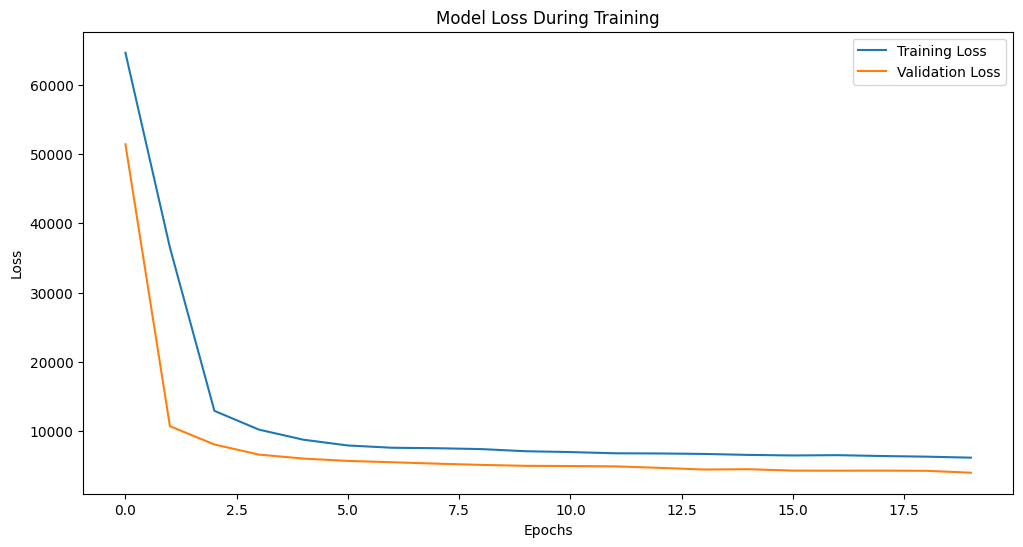

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
MAPE on the Training Data: 26.44%
MAPE on the Validation Data: 26.20%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


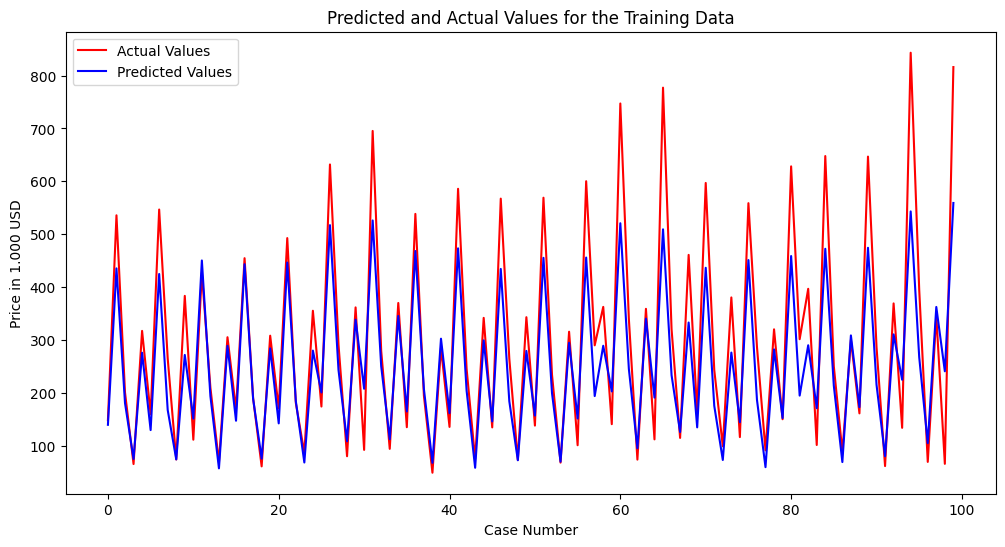

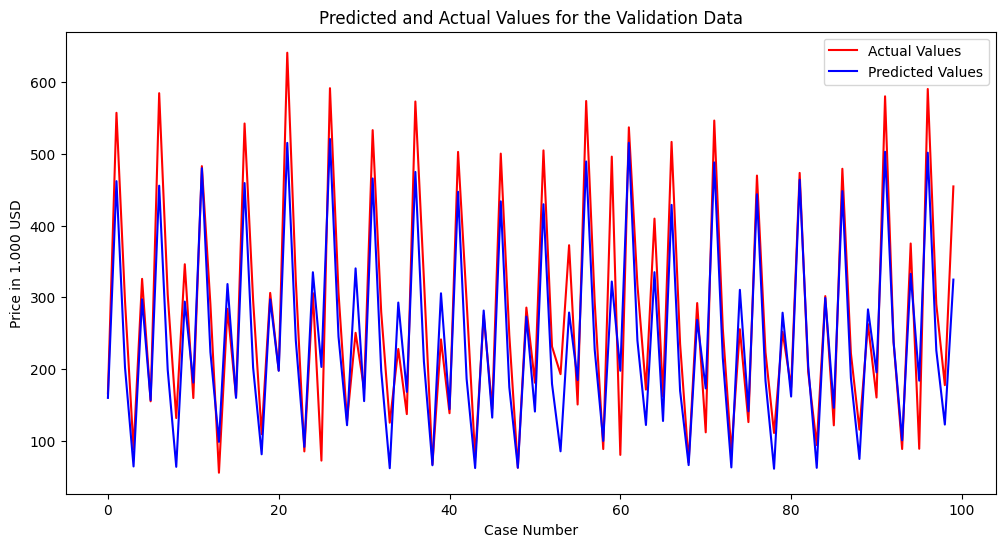

In [11]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')